The Task is to summarize the top 5 insights using the data files provided in the above link. Try tracking the relevant KPIs and metrics/dimensions by joining/correlating the datasets. The objective of the analysis is open-ended. You can use any tool to analyze and visualize the data. Create a presentation with all the relevant insights and submit the PPT document on the link given below

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [2]:
df1 = pd.read_excel('Player_Details.xlsx')
df1.columns = df1.iloc[0]
df1.head(15)

,NaN,Src_Player_Id,Signup_Date,acquisition_channel,src_advertiser_id,Gender,Date_Of_Birth,Internal_Player_YN
0,NaN,Src_Player_Id,Signup_Date,acquisition_channel,src_advertiser_id,Gender,Date_Of_Birth,Internal_Player_YN
1,NaN,12584958,2019-02-23 17:24:49,NaN,999999,M,1991-08-05 00:00:00,N
2,NaN,12356925,2019-01-07 15:57:11,NaN,999999,M,1993-09-09 00:00:00,N
3,NaN,12500831,2019-02-10 08:31:13,NaN,999999,M,1971-10-15 00:00:00,N
4,NaN,12660009,2019-03-12 09:42:53,NaN,999999,M,2000-12-15 00:00:00,N
5,NaN,12447120,2019-01-28 09:53:42,NaN,999999,M,1994-03-07 00:00:00,N
6,NaN,12621456,2019-03-03 15:06:00,NaN,999999,M,1996-12-17 00:00:00,N
7,NaN,19472771,2021-03-11 21:19:37,NaN,999999,M,1981-10-23 00:00:00,N
8,NaN,13007970,2019-05-06 11:59:23,NaN,999999,M,1989-12-07 00:00:00,N
9,NaN,18982054,2021-02-02 10:02:46,NaN,999999,M,1986-12-07 00:00:00,N


In [3]:
df1.drop(0,axis=0,inplace = True)

In [4]:
df1 = df1.iloc[:,1:]

In [5]:
df1.head()

,Src_Player_Id,Signup_Date,acquisition_channel,src_advertiser_id,Gender,Date_Of_Birth,Internal_Player_YN
1,12584958,2019-02-23 17:24:49,NaN,999999,M,1991-08-05 00:00:00,N
2,12356925,2019-01-07 15:57:11,NaN,999999,M,1993-09-09 00:00:00,N
3,12500831,2019-02-10 08:31:13,NaN,999999,M,1971-10-15 00:00:00,N
4,12660009,2019-03-12 09:42:53,NaN,999999,M,2000-12-15 00:00:00,N
5,12447120,2019-01-28 09:53:42,NaN,999999,M,1994-03-07 00:00:00,N


In [6]:
df1.shape

(292785, 7)

the data consists of 2,92,786 observations and 8 features

In [7]:
df1.dtypes

0
Src_Player_Id          object
Signup_Date            object
acquisition_channel    object
src_advertiser_id      object
Gender                 object
Date_Of_Birth          object
Internal_Player_YN     object
dtype: object

In [8]:
df1.dtypes.value_counts()

object    7
dtype: int64

there are 1 float data type column ,7 object datatype column but as per the data we can say signup_date and Date of birth should be date datatype and src_advertisment id should be integer

Basic Understanding of the data

In [9]:
df1.isna().sum()

0
Src_Player_Id              0
Signup_Date                0
acquisition_channel    91506
src_advertiser_id       2066
Gender                    11
Date_Of_Birth              0
Internal_Player_YN         0
dtype: int64

In [10]:
df1.isna().sum()/len(df1)*100

0
Src_Player_Id           0.000000
Signup_Date             0.000000
acquisition_channel    31.253650
src_advertiser_id       0.705637
Gender                  0.003757
Date_Of_Birth           0.000000
Internal_Player_YN      0.000000
dtype: float64

There are some columns with null value in the data frame we will need to imputing and there's huge amount of missing value in the index 0 with 100% null values and index 3 with 31% null value

we need to drop index 0 column , and we need to replace index 3,4,5 null values with median

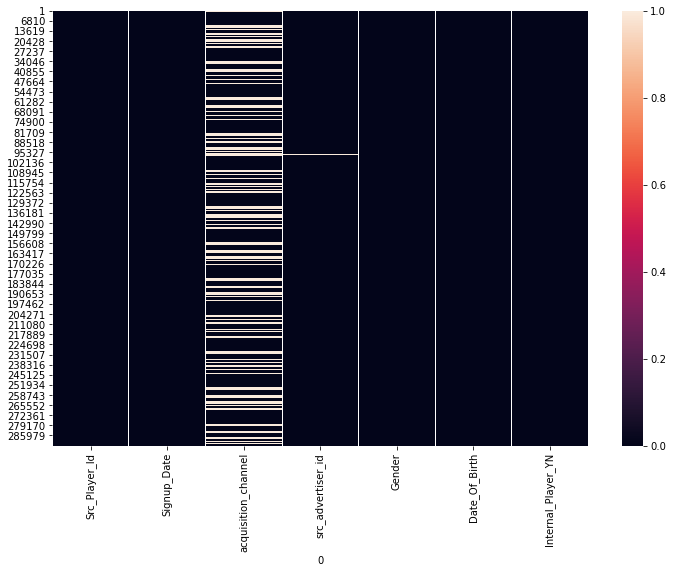

In [11]:
sns.heatmap(df1.isnull())
plt.show()

from the heatmap we can say unnamed 1 and 3 has more null values

In [12]:
df1.describe(include = "O")

,Src_Player_Id,Signup_Date,acquisition_channel,src_advertiser_id,Gender,Date_Of_Birth,Internal_Player_YN
count,292785,292785,201279,290719,292774,292785,292785
unique,292785,291786,9,1555,2,19776,2
top,12582912,2019-09-04 13:52:02,Affiliate,999999,M,1979-02-12 00:00:00,N
freq,1,3,98324,89370,221261,1114,290715


1. 100 % null values in Unnamed 0
2. In acquisition_channel  Affilate is most frequent  
3. there are more Male players then female
4. there are less internal players

Univariate Analysis

In [13]:
df1['acquisition_channel'].unique()

array([nan, 'PPC', 'Others', 'Affiliate', 'Retail', 'Social', 'Display',
       'Programatic', 'Email', 'Content'], dtype=object)

In [148]:
df1['Gender'].unique()

array(['M ', 'F ', nan], dtype=object)

In [152]:
df1['acquisition_channel'].value_counts()/len(df1)*100

Affiliate      33.582321
PPC            28.335126
Social          3.591031
Others          1.806103
Retail          1.260310
Display         0.167700
Programatic     0.002732
Email           0.000683
Content         0.000342
Name: acquisition_channel, dtype: float64

In [150]:
df1['Gender'].value_counts()/len(df1)*100

M     75.571153
F     24.425090
Name: Gender, dtype: float64

In [151]:
df1['Internal_Player_YN'].value_counts()/len(df1)*100

N     99.292997
Y      0.707003
Name: Internal_Player_YN, dtype: float64

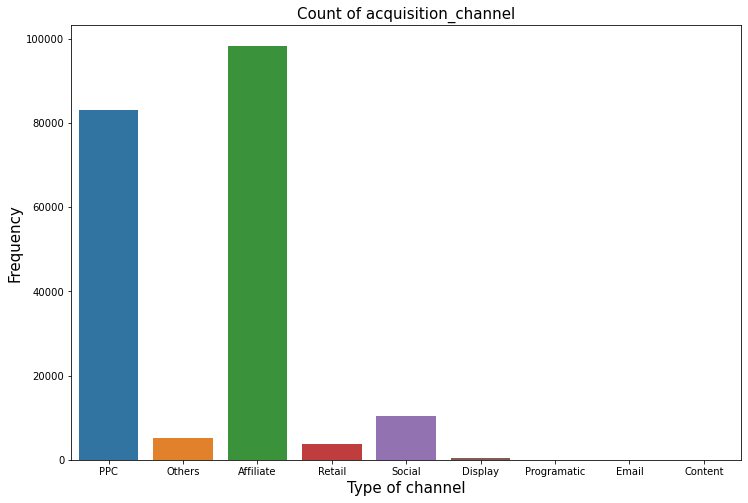

In [15]:
sns.countplot(data=df1, x='acquisition_channel')
plt.title('Count of acquisition_channel', fontsize = 15)
plt.xlabel('Type of channel', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

There are more number of Affilate than PPC


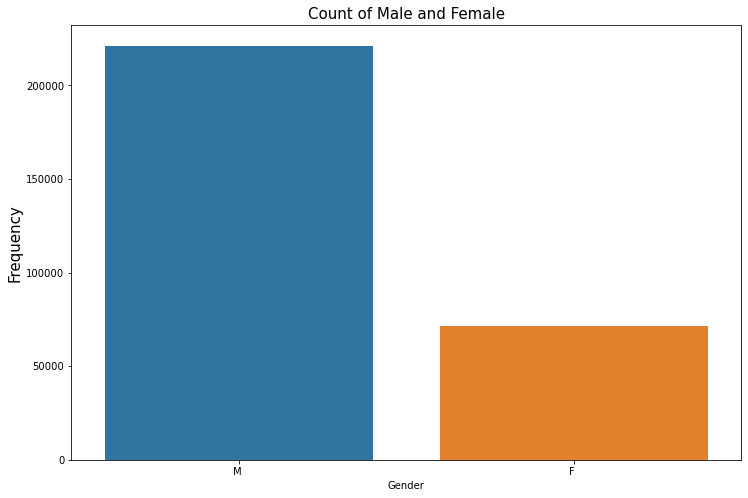

In [16]:
sns.countplot(data=df1, x='Gender')
plt.title('Count of Male and Female', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

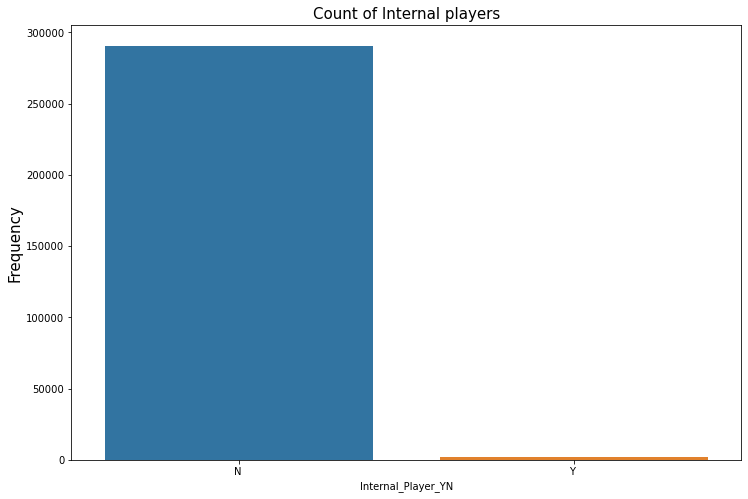

In [17]:
sns.countplot(data=df1, x='Internal_Player_YN')
plt.title('Count of Internal players', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

In [18]:
df2 = pd.read_excel('Player_Activity_Data.xlsx')
df2.columns = df2.iloc[0]
df2.head(15)


,NaN,src_player_id,ActivityMonth,Product,SubProduct,ActivePlayerDays,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win
0,NaN,src_player_id,ActivityMonth,Product,SubProduct,ActivePlayerDays,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win
1,NaN,16585649,2020-08-31 00:00:00,SportsBook,Livebook,1,500,0,500,420
2,NaN,12845036,2019-05-31 00:00:00,SportsBook,Prematch,28,1229.48,1177.85,41.63,34.9692
3,NaN,12720869,2021-06-30 00:00:00,eGaming,Non Table Games,1,73.4,46.2,27.2,22.848
4,NaN,18979743,2021-02-28 00:00:00,eGaming,Non Table Games,1,52,21.7,30.3,25.452
5,NaN,12580168,2020-12-31 00:00:00,eGaming,Non Table Games,1,74,54.6,18.6674,15.680616
6,NaN,15908466,2020-11-30 00:00:00,SportsBook,Livebook,3,458.81,283.18,175.63,147.5292
7,NaN,17719414,2021-01-31 00:00:00,SportsBook,Livebook,21,947.19,694.54,252.65,212.226
8,NaN,16763464,2020-08-31 00:00:00,IVG,IVG,1,20,0,20,16.8
9,NaN,13939149,2019-12-31 00:00:00,eGaming,Non Table Games,2,1841,2118.05,-295.2759,-248.031756


In [19]:
df2.drop(0,axis=0,inplace = True)

In [20]:
df2.dtypes

0
NaN                 float64
src_player_id        object
ActivityMonth        object
Product              object
SubProduct           object
ActivePlayerDays     object
Bet_Amount           object
Win_Amount           object
Gross_Win            object
Net_Gross_Win        object
dtype: object

In [21]:
df2

,NaN,src_player_id,ActivityMonth,Product,SubProduct,ActivePlayerDays,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win
1,NaN,16585649,2020-08-31 00:00:00,SportsBook,Livebook,1,500,0,500,420
2,NaN,12845036,2019-05-31 00:00:00,SportsBook,Prematch,28,1229.48,1177.85,41.63,34.9692
3,NaN,12720869,2021-06-30 00:00:00,eGaming,Non Table Games,1,73.4,46.2,27.2,22.848
4,NaN,18979743,2021-02-28 00:00:00,eGaming,Non Table Games,1,52,21.7,30.3,25.452
5,NaN,12580168,2020-12-31 00:00:00,eGaming,Non Table Games,1,74,54.6,18.6674,15.680616
...,...,...,...,...,...,...,...,...,...,...
860226,NaN,13439064,2019-09-30 00:00:00,SportsBook,Livebook,2,255,0,255,214.2
860227,NaN,16005291,2020-07-31 00:00:00,eGaming,Non Table Games,4,123,53.55,68.9451,57.913884
860228,NaN,15816105,2021-05-31 00:00:00,eGaming,Table Games,1,125,50,75,63
860229,NaN,13435803,2020-12-31 00:00:00,eGaming,Non Table Games,1,31.4,11.45,19.95,16.758


In [22]:
df2.dtypes.value_counts()

object     9
float64    1
dtype: int64

from the data we can say that ActivePlayerDays ,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win are integer but it is given as object which we need to convert

In [23]:
df2['Bet_Amount'] = df2['Bet_Amount'].astype('float')
df2['Win_Amount'] = df2['Win_Amount'].astype('float')
df2['Gross_Win'] = df2['Gross_Win'].astype('float')
df2['Net_Gross_Win'] = df2['Net_Gross_Win'].astype('float')

In [24]:
df2.isna().sum()

0
NaN                 860230
src_player_id            0
ActivityMonth            0
Product                  0
SubProduct               0
ActivePlayerDays         0
Bet_Amount               0
Win_Amount               0
Gross_Win                0
Net_Gross_Win            0
dtype: int64

In [25]:
df2

,NaN,src_player_id,ActivityMonth,Product,SubProduct,ActivePlayerDays,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win
1,NaN,16585649,2020-08-31 00:00:00,SportsBook,Livebook,1,500.00,0.00,500.0000,420.000000
2,NaN,12845036,2019-05-31 00:00:00,SportsBook,Prematch,28,1229.48,1177.85,41.6300,34.969200
3,NaN,12720869,2021-06-30 00:00:00,eGaming,Non Table Games,1,73.40,46.20,27.2000,22.848000
4,NaN,18979743,2021-02-28 00:00:00,eGaming,Non Table Games,1,52.00,21.70,30.3000,25.452000
5,NaN,12580168,2020-12-31 00:00:00,eGaming,Non Table Games,1,74.00,54.60,18.6674,15.680616
...,...,...,...,...,...,...,...,...,...,...
860226,NaN,13439064,2019-09-30 00:00:00,SportsBook,Livebook,2,255.00,0.00,255.0000,214.200000
860227,NaN,16005291,2020-07-31 00:00:00,eGaming,Non Table Games,4,123.00,53.55,68.9451,57.913884
860228,NaN,15816105,2021-05-31 00:00:00,eGaming,Table Games,1,125.00,50.00,75.0000,63.000000
860229,NaN,13435803,2020-12-31 00:00:00,eGaming,Non Table Games,1,31.40,11.45,19.9500,16.758000


There are no null values in that dataset and we need to remove NaN column from the dataset

In [26]:
df2 = df2.iloc[:,1:]

In [27]:
df2

,src_player_id,ActivityMonth,Product,SubProduct,ActivePlayerDays,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win
1,16585649,2020-08-31 00:00:00,SportsBook,Livebook,1,500.00,0.00,500.0000,420.000000
2,12845036,2019-05-31 00:00:00,SportsBook,Prematch,28,1229.48,1177.85,41.6300,34.969200
3,12720869,2021-06-30 00:00:00,eGaming,Non Table Games,1,73.40,46.20,27.2000,22.848000
4,18979743,2021-02-28 00:00:00,eGaming,Non Table Games,1,52.00,21.70,30.3000,25.452000
5,12580168,2020-12-31 00:00:00,eGaming,Non Table Games,1,74.00,54.60,18.6674,15.680616
...,...,...,...,...,...,...,...,...,...
860226,13439064,2019-09-30 00:00:00,SportsBook,Livebook,2,255.00,0.00,255.0000,214.200000
860227,16005291,2020-07-31 00:00:00,eGaming,Non Table Games,4,123.00,53.55,68.9451,57.913884
860228,15816105,2021-05-31 00:00:00,eGaming,Table Games,1,125.00,50.00,75.0000,63.000000
860229,13435803,2020-12-31 00:00:00,eGaming,Non Table Games,1,31.40,11.45,19.9500,16.758000


In [28]:
df2.isna().sum()/len(df1)*100

0
src_player_id       0.0
ActivityMonth       0.0
Product             0.0
SubProduct          0.0
ActivePlayerDays    0.0
Bet_Amount          0.0
Win_Amount          0.0
Gross_Win           0.0
Net_Gross_Win       0.0
dtype: float64

We dropped Nan column using iloc

In [29]:
df2.dtypes

0
src_player_id        object
ActivityMonth        object
Product              object
SubProduct           object
ActivePlayerDays     object
Bet_Amount          float64
Win_Amount          float64
Gross_Win           float64
Net_Gross_Win       float64
dtype: object

In [30]:
df2['src_player_id'] = df2['src_player_id'].astype('int64')

In [31]:
df2['ActivityMonth'] = pd.to_datetime(df2['ActivityMonth'])

In [32]:
df2.dtypes

0
src_player_id                int64
ActivityMonth       datetime64[ns]
Product                     object
SubProduct                  object
ActivePlayerDays            object
Bet_Amount                 float64
Win_Amount                 float64
Gross_Win                  float64
Net_Gross_Win              float64
dtype: object

In [33]:
df2['ActivePlayerDays'] = df2['ActivePlayerDays'].astype('int64')

In [34]:
df2.dtypes

0
src_player_id                int64
ActivityMonth       datetime64[ns]
Product                     object
SubProduct                  object
ActivePlayerDays             int64
Bet_Amount                 float64
Win_Amount                 float64
Gross_Win                  float64
Net_Gross_Win              float64
dtype: object

We converted the datatypes as per data inside the dataset

In [35]:
df2.describe(include = "O")

,Product,SubProduct
count,860230,860230
unique,5,9
top,SportsBook,Non Table Games
freq,420881,338054


Top Product is Sportsbook and subproduct is Non Table Games

In [36]:
df2.describe()

,src_player_id,ActivePlayerDays,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win
count,8.602300e+05,860230.000000,8.602300e+05,8.602300e+05,860230.000000,860230.000000
mean,1.520667e+07,6.352093,3.368930e+03,3.212913e+03,153.665203,129.080785
std,2.348595e+06,7.692135,3.531186e+04,3.515184e+04,2556.753692,2147.692465
min,1.232939e+07,1.000000,0.000000e+00,-1.834000e+04,-874294.300000,-734407.212000
25%,1.323180e+07,1.000000,1.600000e+01,0.000000e+00,1.000000,0.840000
50%,1.465767e+07,3.000000,1.047050e+02,3.479000e+01,27.000000,22.680000
75%,1.728475e+07,8.000000,7.300000e+02,5.622900e+02,128.000000,107.520000
max,2.070358e+07,31.000000,7.358337e+06,7.488657e+06,303359.000000,254821.560000


We can see the 5 point summary in this table of each column

In [37]:
df2['Product'].unique()

array(['SportsBook', 'eGaming', 'IVG', 'Lottery', 'Lotto'], dtype=object)

In [38]:
df2['SubProduct'].unique()

array(['Livebook', 'Prematch', 'Non Table Games', 'IVG', 'Table Games',
       'Lucky Six', 'Lotto', 'LuckyX', 'Next Six'], dtype=object)

In [153]:
df2['Product'].value_counts()/len(df2)*100

SportsBook    48.926566
eGaming       44.853004
Lotto          2.600816
Lottery        1.927392
IVG            1.692222
Name: Product, dtype: float64

In [154]:
df2['SubProduct'].value_counts()/len(df2)*100

Non Table Games    39.298095
Prematch           29.125350
Livebook           19.801216
Table Games         5.554910
Lotto               2.600816
IVG                 1.692222
Lucky Six           1.431826
LuckyX              0.316543
Next Six            0.179022
Name: SubProduct, dtype: float64

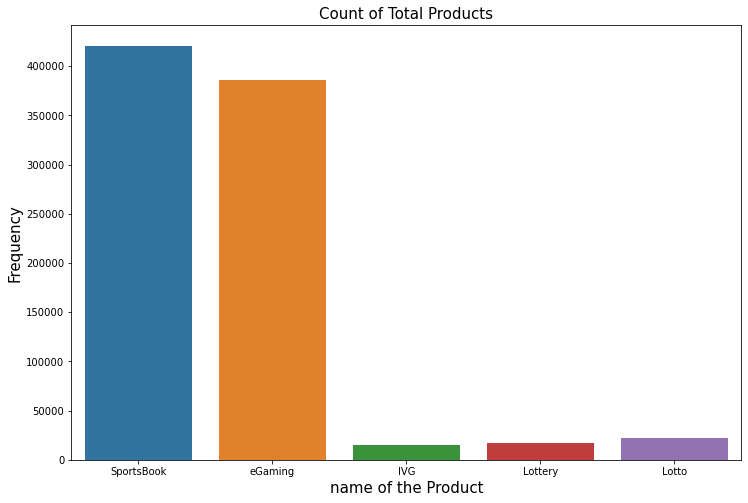

In [41]:
sns.countplot(data=df2, x='Product')
plt.title('Count of Total Products', fontsize = 15)
plt.xlabel('name of the Product', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

There is more frequency in Sportbook product then eGaming compare to other products

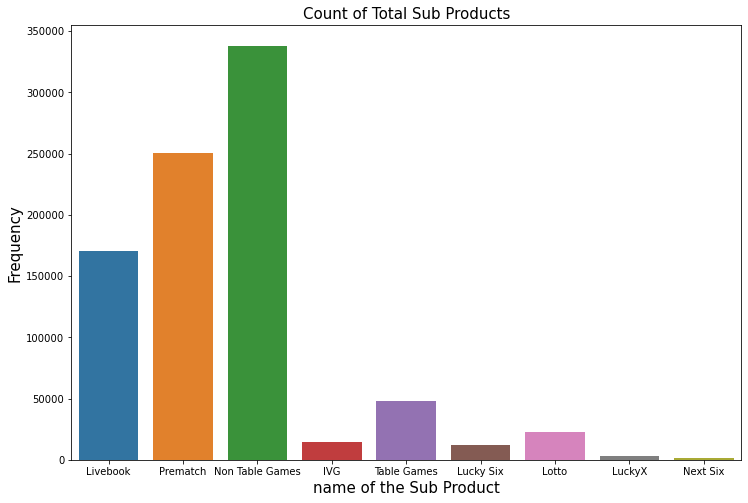

In [42]:
sns.countplot(data=df2, x='SubProduct')
plt.title('Count of Total Sub Products', fontsize = 15)
plt.xlabel('name of the Sub Product', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

we can see there is a high frequency in non table games then prematch and then livebook compare to rest of the sub products 

In [43]:
df3 = pd.read_excel('First_Deposit_Data.xlsx')
df3.head(15)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,Src_Player_Id,First_Deposit_Date,First_Deposit_Channel,First_Deposit_Method,First_Deposit_Amount
1,NaN,13472812,NaN,NaN,NaN,NaN
2,NaN,13331793,NaN,NaN,NaN,NaN
3,NaN,13116242,NaN,NaN,NaN,NaN
4,NaN,12689016,NaN,NaN,NaN,NaN
5,NaN,12681525,NaN,NaN,NaN,NaN
6,NaN,20256057,NaN,NaN,NaN,NaN
7,NaN,19208378,NaN,NaN,NaN,NaN
8,NaN,12473890,NaN,NaN,NaN,NaN
9,NaN,17665172,NaN,NaN,NaN,NaN


In [44]:
df3.columns = df3.iloc[0]

In [45]:
df3

,NaN,Src_Player_Id,First_Deposit_Date,First_Deposit_Channel,First_Deposit_Method,First_Deposit_Amount
0,NaN,Src_Player_Id,First_Deposit_Date,First_Deposit_Channel,First_Deposit_Method,First_Deposit_Amount
1,NaN,13472812,NaN,NaN,NaN,NaN
2,NaN,13331793,NaN,NaN,NaN,NaN
3,NaN,13116242,NaN,NaN,NaN,NaN
4,NaN,12689016,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
292781,NaN,20698616,2021-06-30 14:35:08,Online,MC,50
292782,NaN,20353607,NaN,NaN,NaN,NaN
292783,NaN,12835955,2019-04-18 18:53:14,Online,VISA,100
292784,NaN,20399631,2021-06-17 09:11:35,Online,VISA,50


In [46]:
df3.drop(0,axis=0,inplace = True)

In [47]:
df3

,NaN,Src_Player_Id,First_Deposit_Date,First_Deposit_Channel,First_Deposit_Method,First_Deposit_Amount
1,NaN,13472812,NaN,NaN,NaN,NaN
2,NaN,13331793,NaN,NaN,NaN,NaN
3,NaN,13116242,NaN,NaN,NaN,NaN
4,NaN,12689016,NaN,NaN,NaN,NaN
5,NaN,12681525,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
292781,NaN,20698616,2021-06-30 14:35:08,Online,MC,50
292782,NaN,20353607,NaN,NaN,NaN,NaN
292783,NaN,12835955,2019-04-18 18:53:14,Online,VISA,100
292784,NaN,20399631,2021-06-17 09:11:35,Online,VISA,50


In [48]:
df3.shape

(292785, 6)

In [49]:
df3.dtypes

0
NaN                      float64
Src_Player_Id             object
First_Deposit_Date        object
First_Deposit_Channel     object
First_Deposit_Method      object
First_Deposit_Amount      object
dtype: object

We can see as per data we need to convert Src_player_id to numeric ,First_deposit_channel and first_deposit_method is object only but we need to convert First_deposit_amount to numeric

In [50]:
df3.isna().sum()

0
NaN                      292785
Src_Player_Id                 0
First_Deposit_Date       165524
First_Deposit_Channel    165524
First_Deposit_Method     165524
First_Deposit_Amount     165524
dtype: int64

In [51]:
df3.isna().sum()/len(df3)*100

0
NaN                      100.000000
Src_Player_Id              0.000000
First_Deposit_Date        56.534317
First_Deposit_Channel     56.534317
First_Deposit_Method      56.534317
First_Deposit_Amount      56.534317
dtype: float64

In [52]:
df3['Src_Player_Id'] = df3['Src_Player_Id'].astype('int64')


In [53]:
df3

,NaN,Src_Player_Id,First_Deposit_Date,First_Deposit_Channel,First_Deposit_Method,First_Deposit_Amount
1,NaN,13472812,NaN,NaN,NaN,NaN
2,NaN,13331793,NaN,NaN,NaN,NaN
3,NaN,13116242,NaN,NaN,NaN,NaN
4,NaN,12689016,NaN,NaN,NaN,NaN
5,NaN,12681525,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
292781,NaN,20698616,2021-06-30 14:35:08,Online,MC,50
292782,NaN,20353607,NaN,NaN,NaN,NaN
292783,NaN,12835955,2019-04-18 18:53:14,Online,VISA,100
292784,NaN,20399631,2021-06-17 09:11:35,Online,VISA,50


In [54]:
df3.describe(include = "O")

,First_Deposit_Date,First_Deposit_Channel,First_Deposit_Method,First_Deposit_Amount
count,127261,127261,127261,127261.0
unique,127097,2,8,793.0
top,2019-08-15 08:33:15,Online,VISA,50.0
freq,2,98483,53677,26120.0


In [55]:
df3.describe()

,NaN,Src_Player_Id
count,0.0,2.927850e+05
mean,NaN,1.596963e+07
std,NaN,2.605338e+06
min,NaN,1.232939e+07
25%,NaN,1.349660e+07
50%,NaN,1.541805e+07
75%,NaN,1.835857e+07
max,NaN,2.082592e+07


most preferred first deposit channel is online and first deposit method is VISA
top first deposit amount is 50


In [56]:
df3 = df3.iloc[:,1:]
df3

,Src_Player_Id,First_Deposit_Date,First_Deposit_Channel,First_Deposit_Method,First_Deposit_Amount
1,13472812,NaN,NaN,NaN,NaN
2,13331793,NaN,NaN,NaN,NaN
3,13116242,NaN,NaN,NaN,NaN
4,12689016,NaN,NaN,NaN,NaN
5,12681525,NaN,NaN,NaN,NaN
...,...,...,...,...,...
292781,20698616,2021-06-30 14:35:08,Online,MC,50
292782,20353607,NaN,NaN,NaN,NaN
292783,12835955,2019-04-18 18:53:14,Online,VISA,100
292784,20399631,2021-06-17 09:11:35,Online,VISA,50


In [57]:
df3['First_Deposit_Channel'].unique()

array([nan, 'Online', 'Retail'], dtype=object)

In [58]:
df3['First_Deposit_Method'].unique()

array([nan, 'VISA', 'MC', 'PaysafecardViaSC', 'RetailDeposit',
       'MoneyBookersViaSC', 'MAESTRO', 'NetellerviaSC', 'Correction'],
      dtype=object)

In [155]:
df3['First_Deposit_Channel'].value_counts()/len(df3)*100

Online    33.636628
Retail     9.829055
Name: First_Deposit_Channel, dtype: float64

In [156]:
df3['First_Deposit_Method'].value_counts()/len(df3)*100

VISA                 18.333248
RetailDeposit         9.829055
MC                    9.522346
PaysafecardViaSC      4.641290
MAESTRO               0.909883
MoneyBookersViaSC     0.204587
NetellerviaSC         0.024250
Correction            0.001025
Name: First_Deposit_Method, dtype: float64

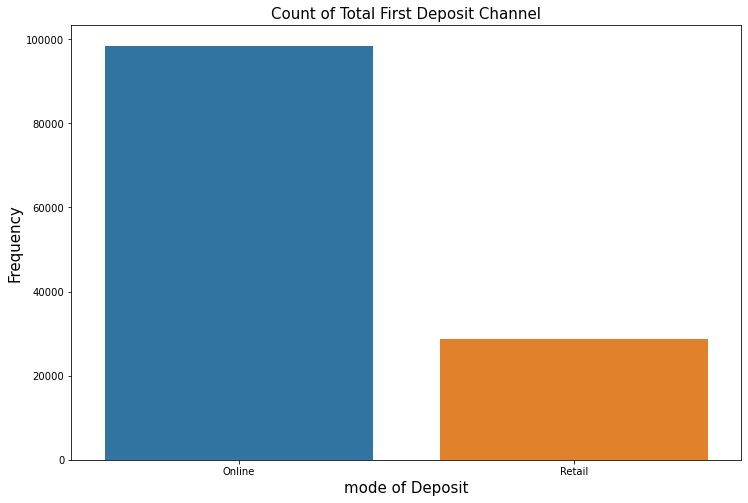

In [61]:
sns.countplot(data=df3, x='First_Deposit_Channel')
plt.title('Count of Total First Deposit Channel', fontsize = 15)
plt.xlabel('mode of Deposit', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

most prefered channel is online mode then retail

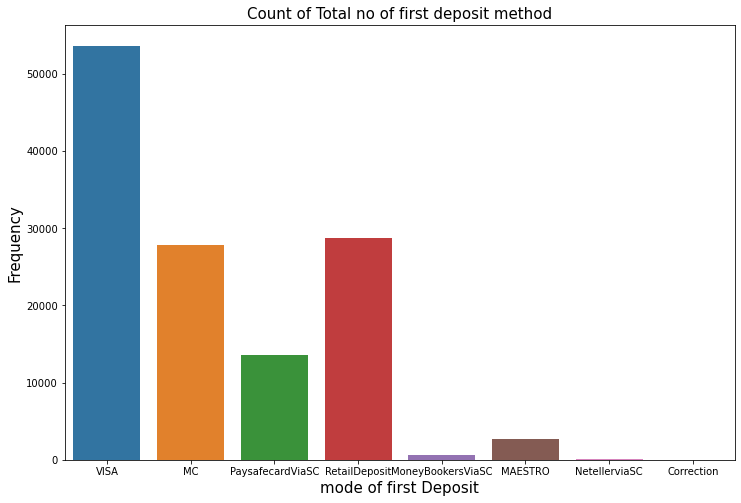

In [62]:
sns.countplot(data=df3, x='First_Deposit_Method')
plt.title('Count of Total no of first deposit method', fontsize = 15)
plt.xlabel('mode of first Deposit', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

VISA is the most used mode of deposit payment then compare to other mode

In [64]:
df4 = pd.read_excel('First_Bet_Data.xlsx')
df4.columns = df4.iloc[0]
df4.head(15)

,NaN,Src_Player_Id,System_First_Bet_Datetime,System_First_BetSlip_Amt,System_First_Bet_Product_Group,System_First_Bet_Product,System_First_Bet_Channel,System_First_Bet_Platform
0,NaN,Src_Player_Id,System_First_Bet_Datetime,System_First_BetSlip_Amt,System_First_Bet_Product_Group,System_First_Bet_Product,System_First_Bet_Channel,System_First_Bet_Platform
1,NaN,15643431,2020-10-09 03:57:29,2.5,eGaming,Non Table Games,Online,Mobile
2,NaN,13593034,2019-09-27 15:03:58.244000,10,Sports,Prematch,Online,Mobile
3,NaN,15894194,2021-02-28 02:22:07,2,eGaming,Non Table Games,Online,Web
4,NaN,13238000,2019-07-08 10:39:45,0.4,eGaming,Non Table Games,Online,Mobile
5,NaN,12866848,2019-04-27 14:20:27,0.4,eGaming,Non Table Games,Online,Mobile
6,NaN,15025504,2020-02-25 19:05:39,4,eGaming,Non Table Games,Online,Mobile
7,NaN,14688049,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,13436690,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,13717946,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df4 = df4.iloc[:,1:]
df4

,Src_Player_Id,System_First_Bet_Datetime,System_First_BetSlip_Amt,System_First_Bet_Product_Group,System_First_Bet_Product,System_First_Bet_Channel,System_First_Bet_Platform
0,Src_Player_Id,System_First_Bet_Datetime,System_First_BetSlip_Amt,System_First_Bet_Product_Group,System_First_Bet_Product,System_First_Bet_Channel,System_First_Bet_Platform
1,15643431,2020-10-09 03:57:29,2.5,eGaming,Non Table Games,Online,Mobile
2,13593034,2019-09-27 15:03:58.244000,10,Sports,Prematch,Online,Mobile
3,15894194,2021-02-28 02:22:07,2,eGaming,Non Table Games,Online,Web
4,13238000,2019-07-08 10:39:45,0.4,eGaming,Non Table Games,Online,Mobile
...,...,...,...,...,...,...,...
292781,18703784,NaN,NaN,NaN,NaN,NaN,NaN
292782,12340331,2020-05-19 07:44:29,0.8,eGaming,Non Table Games,Online,Web
292783,12343435,2019-01-04 14:08:42,1,eGaming,Non Table Games,Online,Mobile
292784,12358643,2019-01-08 12:22:11.442000,1,Sports,Prematch,Online,Mobile


In [66]:
df4.drop(0,axis=0,inplace = True)

In [67]:
df4

,Src_Player_Id,System_First_Bet_Datetime,System_First_BetSlip_Amt,System_First_Bet_Product_Group,System_First_Bet_Product,System_First_Bet_Channel,System_First_Bet_Platform
1,15643431,2020-10-09 03:57:29,2.5,eGaming,Non Table Games,Online,Mobile
2,13593034,2019-09-27 15:03:58.244000,10,Sports,Prematch,Online,Mobile
3,15894194,2021-02-28 02:22:07,2,eGaming,Non Table Games,Online,Web
4,13238000,2019-07-08 10:39:45,0.4,eGaming,Non Table Games,Online,Mobile
5,12866848,2019-04-27 14:20:27,0.4,eGaming,Non Table Games,Online,Mobile
...,...,...,...,...,...,...,...
292781,18703784,NaN,NaN,NaN,NaN,NaN,NaN
292782,12340331,2020-05-19 07:44:29,0.8,eGaming,Non Table Games,Online,Web
292783,12343435,2019-01-04 14:08:42,1,eGaming,Non Table Games,Online,Mobile
292784,12358643,2019-01-08 12:22:11.442000,1,Sports,Prematch,Online,Mobile


In [68]:
df4.shape

(292785, 7)

In [69]:
df4.dtypes

0
Src_Player_Id                     object
System_First_Bet_Datetime         object
System_First_BetSlip_Amt          object
System_First_Bet_Product_Group    object
System_First_Bet_Product          object
System_First_Bet_Channel          object
System_First_Bet_Platform         object
dtype: object

In [71]:
df4.isna().sum()

0
Src_Player_Id                          0
System_First_Bet_Datetime         133619
System_First_BetSlip_Amt          133619
System_First_Bet_Product_Group    133619
System_First_Bet_Product          133619
System_First_Bet_Channel          133619
System_First_Bet_Platform         133619
dtype: int64

In [72]:
df4.isna().sum()/len(df4)*100

0
Src_Player_Id                      0.000000
System_First_Bet_Datetime         45.637242
System_First_BetSlip_Amt          45.637242
System_First_Bet_Product_Group    45.637242
System_First_Bet_Product          45.637242
System_First_Bet_Channel          45.637242
System_First_Bet_Platform         45.637242
dtype: float64

there are 45% null values in every column except src_player_id

In [74]:
df4.describe(include = "O")

,Src_Player_Id,System_First_Bet_Datetime,System_First_BetSlip_Amt,System_First_Bet_Product_Group,System_First_Bet_Product,System_First_Bet_Channel,System_First_Bet_Platform
count,292785,159166,159166.0,159166,159166,159166,159166
unique,292785,159069,1294.0,5,9,1,2
top,13097442,2019-12-18 15:20:54,1.0,eGaming,Non Table Games,Online,Mobile
freq,1,2,31327.0,94593,91147,159166,127948


In [76]:
df4['System_First_BetSlip_Amt'].unique()

array([2.5, 10, 2, ..., 6615, 43.2, 356], dtype=object)

In [77]:
df4['System_First_Bet_Product_Group'].unique()

array(['eGaming', 'Sports', nan, 'IVG', 'Lotto', 'Lottery'], dtype=object)

In [78]:
df4['System_First_Bet_Channel'].unique()

array(['Online', nan], dtype=object)

In [79]:
df4['System_First_Bet_Platform'].unique()

array(['Mobile', 'Web', nan], dtype=object)

In [157]:
df4['System_First_Bet_Product_Group'].value_counts()/len(df4)*100

eGaming    32.308008
Sports     20.954284
Lotto       0.594976
Lottery     0.380142
IVG         0.125348
Name: System_First_Bet_Product_Group, dtype: float64

In [81]:
df4['System_First_Bet_Channel'].value_counts()

Online    159166
Name: System_First_Bet_Channel, dtype: int64

In [82]:
df4['System_First_Bet_Platform'].value_counts()

Mobile    127948
Web        31218
Name: System_First_Bet_Platform, dtype: int64

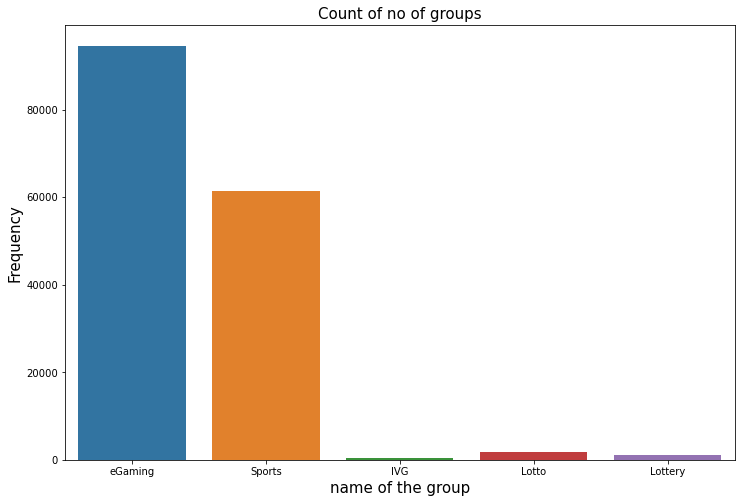

In [83]:
sns.countplot(data=df4, x='System_First_Bet_Product_Group')
plt.title('Count of no of groups', fontsize = 15)
plt.xlabel('name of the group', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

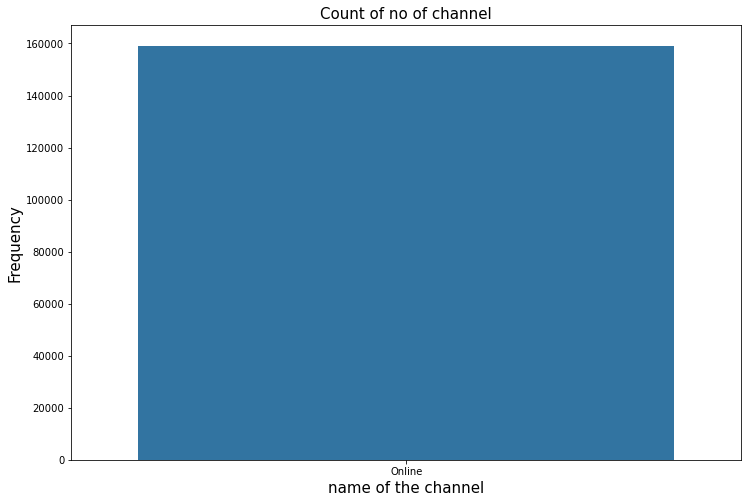

In [84]:
sns.countplot(data=df4, x='System_First_Bet_Channel')
plt.title('Count of no of channel', fontsize = 15)
plt.xlabel('name of the channel', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

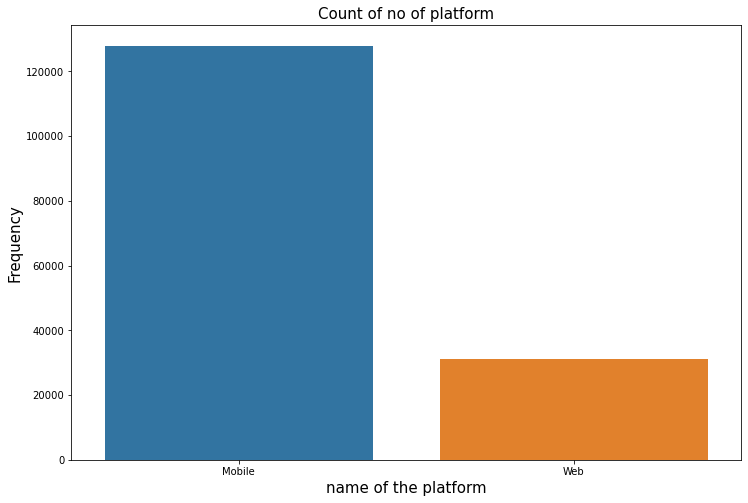

In [85]:
sns.countplot(data=df4, x='System_First_Bet_Platform')
plt.title('Count of no of platform', fontsize = 15)
plt.xlabel('name of the platform', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

In [86]:
df5 = pd.read_excel('BonusCost_Data.xlsx')
df5.columns = df5.iloc[0]
df5.head(15)

,NaN,Src_PLAYER_ID,ActivityMonth,Product,BONUS_COST
0,NaN,Src_PLAYER_ID,ActivityMonth,Product,BONUS_COST
1,NaN,16051927,2020-06-30 00:00:00,eGaming,50
2,NaN,19309540,2021-02-28 00:00:00,eGaming,40
3,NaN,13176431,2020-01-31 00:00:00,eGaming,15
4,NaN,12405628,2019-02-28 00:00:00,SportsBook,30
5,NaN,17486248,2021-02-28 00:00:00,eGaming,25
6,NaN,13506896,2019-09-30 00:00:00,SportsBook,150
7,NaN,12804682,2020-08-31 00:00:00,eGaming,60
8,NaN,16447108,2020-07-31 00:00:00,eGaming,205
9,NaN,12482596,2019-02-28 00:00:00,SportsBook,600


In [87]:
df5 = df5.iloc[:,1:]
df5

,Src_PLAYER_ID,ActivityMonth,Product,BONUS_COST
0,Src_PLAYER_ID,ActivityMonth,Product,BONUS_COST
1,16051927,2020-06-30 00:00:00,eGaming,50
2,19309540,2021-02-28 00:00:00,eGaming,40
3,13176431,2020-01-31 00:00:00,eGaming,15
4,12405628,2019-02-28 00:00:00,SportsBook,30
...,...,...,...,...
207066,12655588,2020-12-31 00:00:00,eGaming,20
207067,15199116,2020-03-31 00:00:00,eGaming,100
207068,18399633,2020-12-31 00:00:00,eGaming,25
207069,15298566,2020-06-30 00:00:00,eGaming,20


In [88]:
df5.drop(0,axis=0,inplace = True)
df5

,Src_PLAYER_ID,ActivityMonth,Product,BONUS_COST
1,16051927,2020-06-30 00:00:00,eGaming,50
2,19309540,2021-02-28 00:00:00,eGaming,40
3,13176431,2020-01-31 00:00:00,eGaming,15
4,12405628,2019-02-28 00:00:00,SportsBook,30
5,17486248,2021-02-28 00:00:00,eGaming,25
...,...,...,...,...
207066,12655588,2020-12-31 00:00:00,eGaming,20
207067,15199116,2020-03-31 00:00:00,eGaming,100
207068,18399633,2020-12-31 00:00:00,eGaming,25
207069,15298566,2020-06-30 00:00:00,eGaming,20


In [89]:
df5.shape

(207070, 4)

In [90]:
df5.dtypes

0
Src_PLAYER_ID    object
ActivityMonth    object
Product          object
BONUS_COST       object
dtype: object

In [91]:
df5.isna().sum()

0
Src_PLAYER_ID    0
ActivityMonth    0
Product          0
BONUS_COST       0
dtype: int64

In [92]:
df5.isna().sum()/len(df5)*100

0
Src_PLAYER_ID    0.0
ActivityMonth    0.0
Product          0.0
BONUS_COST       0.0
dtype: float64

In [94]:
df5.describe(include = "O")

,Src_PLAYER_ID,ActivityMonth,Product,BONUS_COST
count,207070,207070,207070,207070.0
unique,100749,30,2,7518.0
top,12412144,2021-04-30 00:00:00,eGaming,50.0
freq,36,12895,150191,19114.0


In [95]:
df5['Product'].unique()

array(['eGaming', 'SportsBook'], dtype=object)

In [158]:
df5['Product'].value_counts()/len(df5)*100

eGaming       72.531511
SportsBook    27.468489
Name: Product, dtype: float64

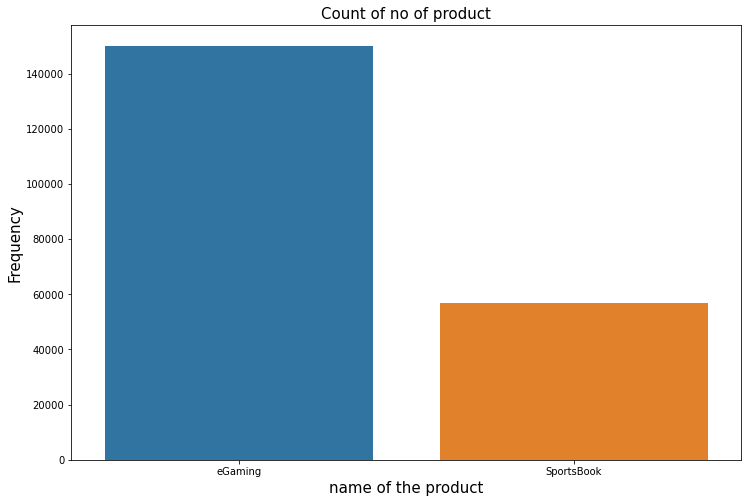

In [98]:
sns.countplot(data=df5, x='Product')
plt.title('Count of no of product', fontsize = 15)
plt.xlabel('name of the product', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

Lets join the 5 dataframes

In [100]:
df1

,Src_Player_Id,Signup_Date,acquisition_channel,src_advertiser_id,Gender,Date_Of_Birth,Internal_Player_YN
1,12584958,2019-02-23 17:24:49,NaN,999999,M,1991-08-05 00:00:00,N
2,12356925,2019-01-07 15:57:11,NaN,999999,M,1993-09-09 00:00:00,N
3,12500831,2019-02-10 08:31:13,NaN,999999,M,1971-10-15 00:00:00,N
4,12660009,2019-03-12 09:42:53,NaN,999999,M,2000-12-15 00:00:00,N
5,12447120,2019-01-28 09:53:42,NaN,999999,M,1994-03-07 00:00:00,N
...,...,...,...,...,...,...,...
292781,18898864,2021-01-26 12:05:22,Affiliate,130850,F,1993-10-17 00:00:00,N
292782,19575899,2021-03-19 22:24:53,Affiliate,130850,M,1988-11-20 00:00:00,N
292783,20345090,2021-05-27 10:11:50,Affiliate,130850,M,1982-06-11 00:00:00,N
292784,19360675,2021-03-03 00:01:49,Affiliate,130850,F,2000-06-16 00:00:00,N


In [101]:
df2

,src_player_id,ActivityMonth,Product,SubProduct,ActivePlayerDays,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win
1,16585649,2020-08-31,SportsBook,Livebook,1,500.00,0.00,500.0000,420.000000
2,12845036,2019-05-31,SportsBook,Prematch,28,1229.48,1177.85,41.6300,34.969200
3,12720869,2021-06-30,eGaming,Non Table Games,1,73.40,46.20,27.2000,22.848000
4,18979743,2021-02-28,eGaming,Non Table Games,1,52.00,21.70,30.3000,25.452000
5,12580168,2020-12-31,eGaming,Non Table Games,1,74.00,54.60,18.6674,15.680616
...,...,...,...,...,...,...,...,...,...
860226,13439064,2019-09-30,SportsBook,Livebook,2,255.00,0.00,255.0000,214.200000
860227,16005291,2020-07-31,eGaming,Non Table Games,4,123.00,53.55,68.9451,57.913884
860228,15816105,2021-05-31,eGaming,Table Games,1,125.00,50.00,75.0000,63.000000
860229,13435803,2020-12-31,eGaming,Non Table Games,1,31.40,11.45,19.9500,16.758000


In [102]:
df3

,Src_Player_Id,First_Deposit_Date,First_Deposit_Channel,First_Deposit_Method,First_Deposit_Amount
1,13472812,NaN,NaN,NaN,NaN
2,13331793,NaN,NaN,NaN,NaN
3,13116242,NaN,NaN,NaN,NaN
4,12689016,NaN,NaN,NaN,NaN
5,12681525,NaN,NaN,NaN,NaN
...,...,...,...,...,...
292781,20698616,2021-06-30 14:35:08,Online,MC,50
292782,20353607,NaN,NaN,NaN,NaN
292783,12835955,2019-04-18 18:53:14,Online,VISA,100
292784,20399631,2021-06-17 09:11:35,Online,VISA,50


In [103]:
df4

,Src_Player_Id,System_First_Bet_Datetime,System_First_BetSlip_Amt,System_First_Bet_Product_Group,System_First_Bet_Product,System_First_Bet_Channel,System_First_Bet_Platform
1,15643431,2020-10-09 03:57:29,2.5,eGaming,Non Table Games,Online,Mobile
2,13593034,2019-09-27 15:03:58.244000,10,Sports,Prematch,Online,Mobile
3,15894194,2021-02-28 02:22:07,2,eGaming,Non Table Games,Online,Web
4,13238000,2019-07-08 10:39:45,0.4,eGaming,Non Table Games,Online,Mobile
5,12866848,2019-04-27 14:20:27,0.4,eGaming,Non Table Games,Online,Mobile
...,...,...,...,...,...,...,...
292781,18703784,NaN,NaN,NaN,NaN,NaN,NaN
292782,12340331,2020-05-19 07:44:29,0.8,eGaming,Non Table Games,Online,Web
292783,12343435,2019-01-04 14:08:42,1,eGaming,Non Table Games,Online,Mobile
292784,12358643,2019-01-08 12:22:11.442000,1,Sports,Prematch,Online,Mobile


In [104]:
df5

,Src_PLAYER_ID,ActivityMonth,Product,BONUS_COST
1,16051927,2020-06-30 00:00:00,eGaming,50
2,19309540,2021-02-28 00:00:00,eGaming,40
3,13176431,2020-01-31 00:00:00,eGaming,15
4,12405628,2019-02-28 00:00:00,SportsBook,30
5,17486248,2021-02-28 00:00:00,eGaming,25
...,...,...,...,...
207066,12655588,2020-12-31 00:00:00,eGaming,20
207067,15199116,2020-03-31 00:00:00,eGaming,100
207068,18399633,2020-12-31 00:00:00,eGaming,25
207069,15298566,2020-06-30 00:00:00,eGaming,20


In [105]:
df5.rename(columns = {'Src_PLAYER_ID' : 'Src_Player_Id'}, inplace = True)

In [115]:
df5

,Src_Player_Id,ActivityMonth,Product,BONUS_COST
1,16051927,2020-06-30 00:00:00,eGaming,50
2,19309540,2021-02-28 00:00:00,eGaming,40
3,13176431,2020-01-31 00:00:00,eGaming,15
4,12405628,2019-02-28 00:00:00,SportsBook,30
5,17486248,2021-02-28 00:00:00,eGaming,25
...,...,...,...,...
207066,12655588,2020-12-31 00:00:00,eGaming,20
207067,15199116,2020-03-31 00:00:00,eGaming,100
207068,18399633,2020-12-31 00:00:00,eGaming,25
207069,15298566,2020-06-30 00:00:00,eGaming,20


In [120]:
duplicate1 = df1[df1.duplicated()]

In [138]:
duplicate1

,Src_Player_Id,Signup_Date,acquisition_channel,src_advertiser_id,Gender,Date_Of_Birth,Internal_Player_YN


In [122]:
duplicate2 =  df2[df2.duplicated()]

In [139]:
duplicate2

,src_player_id,ActivityMonth,Product,SubProduct,ActivePlayerDays,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win


In [125]:
duplicate3 =  df3[df3.duplicated()]
duplicate3

,Src_Player_Id,First_Deposit_Date,First_Deposit_Channel,First_Deposit_Method,First_Deposit_Amount


In [126]:
duplicate4 =  df4[df4.duplicated()]
duplicate4

,Src_Player_Id,System_First_Bet_Datetime,System_First_BetSlip_Amt,System_First_Bet_Product_Group,System_First_Bet_Product,System_First_Bet_Channel,System_First_Bet_Platform


In [127]:
duplicate5 =  df5[df5.duplicated()]
duplicate5

,Src_Player_Id,ActivityMonth,Product,BONUS_COST


In [135]:
df2

,src_player_id,ActivityMonth,Product,SubProduct,ActivePlayerDays,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win
1,16585649,2020-08-31,SportsBook,Livebook,1,500.00,0.00,500.0000,420.000000
2,12845036,2019-05-31,SportsBook,Prematch,28,1229.48,1177.85,41.6300,34.969200
3,12720869,2021-06-30,eGaming,Non Table Games,1,73.40,46.20,27.2000,22.848000
4,18979743,2021-02-28,eGaming,Non Table Games,1,52.00,21.70,30.3000,25.452000
5,12580168,2020-12-31,eGaming,Non Table Games,1,74.00,54.60,18.6674,15.680616
...,...,...,...,...,...,...,...,...,...
860226,13439064,2019-09-30,SportsBook,Livebook,2,255.00,0.00,255.0000,214.200000
860227,16005291,2020-07-31,eGaming,Non Table Games,4,123.00,53.55,68.9451,57.913884
860228,15816105,2021-05-31,eGaming,Table Games,1,125.00,50.00,75.0000,63.000000
860229,13435803,2020-12-31,eGaming,Non Table Games,1,31.40,11.45,19.9500,16.758000


In [136]:
df2.rename(columns ={'src_player_id': "Src_Player_Id"},inplace=True)

In [137]:
df2

,Src_Player_Id,ActivityMonth,Product,SubProduct,ActivePlayerDays,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win
1,16585649,2020-08-31,SportsBook,Livebook,1,500.00,0.00,500.0000,420.000000
2,12845036,2019-05-31,SportsBook,Prematch,28,1229.48,1177.85,41.6300,34.969200
3,12720869,2021-06-30,eGaming,Non Table Games,1,73.40,46.20,27.2000,22.848000
4,18979743,2021-02-28,eGaming,Non Table Games,1,52.00,21.70,30.3000,25.452000
5,12580168,2020-12-31,eGaming,Non Table Games,1,74.00,54.60,18.6674,15.680616
...,...,...,...,...,...,...,...,...,...
860226,13439064,2019-09-30,SportsBook,Livebook,2,255.00,0.00,255.0000,214.200000
860227,16005291,2020-07-31,eGaming,Non Table Games,4,123.00,53.55,68.9451,57.913884
860228,15816105,2021-05-31,eGaming,Table Games,1,125.00,50.00,75.0000,63.000000
860229,13435803,2020-12-31,eGaming,Non Table Games,1,31.40,11.45,19.9500,16.758000


In [140]:
#define list of DataFrames
dfs = [df1, df2, df3,df4,df5]

#merge all DataFrames into one
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['Src_Player_Id'],
                                            how='outer'), dfs)

In [144]:
final_df.head()

,Src_Player_Id,Signup_Date,acquisition_channel,src_advertiser_id,Gender,Date_Of_Birth,Internal_Player_YN,ActivityMonth_x,Product_x,SubProduct,...,First_Deposit_Amount,System_First_Bet_Datetime,System_First_BetSlip_Amt,System_First_Bet_Product_Group,System_First_Bet_Product,System_First_Bet_Channel,System_First_Bet_Platform,ActivityMonth_y,Product_y,BONUS_COST
0,12584958,2019-02-23 17:24:49,NaN,999999,M,1991-08-05 00:00:00,N,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12356925,2019-01-07 15:57:11,NaN,999999,M,1993-09-09 00:00:00,N,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12500831,2019-02-10 08:31:13,NaN,999999,M,1971-10-15 00:00:00,N,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12660009,2019-03-12 09:42:53,NaN,999999,M,2000-12-15 00:00:00,N,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12447120,2019-01-28 09:53:42,NaN,999999,M,1994-03-07 00:00:00,N,2019-01-31,eGaming,Non Table Games,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
final_df.shape

(3617688, 28)

In [146]:
final_df.describe()

,ActivePlayerDays,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win
count,3.492230e+06,3.492230e+06,3.492230e+06,3.492230e+06,3.492230e+06
mean,7.194145e+00,5.228491e+03,4.990014e+03,2.340742e+02,1.966250e+02
std,8.044402e+00,4.587245e+04,4.540248e+04,3.276971e+03,2.752685e+03
min,1.000000e+00,0.000000e+00,-1.834000e+04,-8.742943e+05,-7.344072e+05
25%,1.000000e+00,2.800000e+01,0.000000e+00,2.000000e+00,1.680000e+00
50%,4.000000e+00,1.909400e+02,8.860000e+01,3.785410e+01,3.180240e+01
75%,1.000000e+01,1.381000e+03,1.150300e+03,2.000000e+02,1.680000e+02
max,3.100000e+01,7.358337e+06,7.488657e+06,3.033590e+05,2.548216e+05


In [147]:
final_df.describe(include='O')

,Src_Player_Id,Signup_Date,acquisition_channel,src_advertiser_id,Gender,Date_Of_Birth,Internal_Player_YN,Product_x,SubProduct,First_Deposit_Date,...,First_Deposit_Amount,System_First_Bet_Datetime,System_First_BetSlip_Amt,System_First_Bet_Product_Group,System_First_Bet_Product,System_First_Bet_Channel,System_First_Bet_Platform,ActivityMonth_y,Product_y,BONUS_COST
count,3617688,3617688,2443370,3615622,3617677,3617688,3617688,3492230,3492230,3442150,...,3442150.0,3482773,3482773.0,3482773,3482773,3482773,3482773,3295556,3295556,3295556.0
unique,292785,291786,9,1555,2,19776,2,5,9,127097,...,793.0,159069,1294.0,5,9,1,2,30,2,7518.0
top,12507035,2019-02-11 18:03:14,PPC,999999,M,1989-05-24 00:00:00,N,SportsBook,Non Table Games,2019-02-12 09:26:55,...,50.0,2019-02-12 11:35:37.701000,1.0,Sports,Non Table Games,Online,Mobile,2021-02-28 00:00:00,eGaming,50.0
freq,2716,2716,1327513,1171008,3072310,3428,3615618,1676674,1400773,2716,...,726455.0,2716,559640.0,1784310,1580195,3482773,2896164,194789,2171885,359200.0
